*Predictive Analysis*
- **Regression**:multiple liniare Regression
    - **Welche Erfolgsfaktoren (Wen kennen, Wie verbunden, Metriken) existieren im Netzwerk?**
- **Classification**: multiple logisitische Regression 
    - mit Zentralitätsmetrikwerten Game Kategorien vorhersagen


In [90]:
import pandas as pd
import networkx as nx
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns


from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import metrics




In [91]:
#load the nx graph object, stored in a pickle file
G = nx.read_gpickle("who_follows_who_new2.pickle")

In [92]:
#inspect graph object
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 78
Number of edges: 1223
Average in degree:  15.6795
Average out degree:  15.6795


In [93]:
all_centralities_df = pd.DataFrame()

In [94]:
in_deg_iter = G.in_degree()
#print(in_deg_iter)
in_deg=[v/(78-1) for k, v in in_deg_iter]
#in_deg

In [95]:

all_centralities_df["in_degree"]=in_deg
all_centralities_df["betweenness"]=nx.betweenness_centrality(G).values()
all_centralities_df["eigenvector"]=nx.eigenvector_centrality(G).values()
all_centralities_df["pagerank"]=nx.pagerank_numpy(G,weight=None).values()
all_centralities_df["closeness"]=nx.closeness_centrality(G).values()



In [96]:
df_r = all_centralities_df.rank(axis=0,method="max", ascending=False)
df_r

,in_degree,betweenness,eigenvector,pagerank,closeness
0,34.0,34.0,33.0,31.0,35.0
1,30.0,45.0,27.0,33.0,28.0
2,7.0,3.0,10.0,4.0,7.0
3,64.0,56.0,54.0,60.0,49.0
4,56.0,13.0,46.0,48.0,45.0
...,...,...,...,...,...
73,56.0,51.0,64.0,61.0,66.0
74,49.0,26.0,58.0,56.0,57.0
75,56.0,67.0,62.0,64.0,62.0
76,66.0,71.0,65.0,68.0,66.0


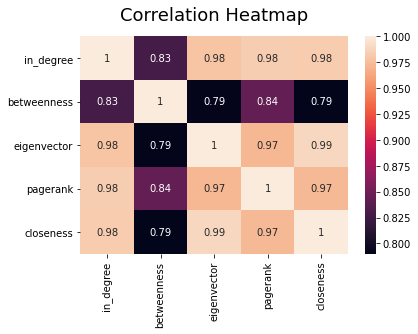

In [97]:
corrMatrix = all_centralities_df.corr("spearman")

heatmap=sns.heatmap(corrMatrix, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16);
plt.savefig("indeg_corr_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()

In [98]:
all_centralities_df.iloc[:,1:]

,betweenness,eigenvector,pagerank,closeness
0,0.008887,0.096742,0.014448,0.495034
1,0.003348,0.129003,0.013877,0.521897
2,0.055871,0.189312,0.026204,0.595794
3,0.000742,0.036672,0.005746,0.440031
4,0.026423,0.055636,0.008580,0.457991
...,...,...,...,...
73,0.001198,0.019463,0.005663,0.384712
74,0.010184,0.029656,0.006446,0.413035
75,0.000107,0.023879,0.005382,0.400742
76,0.000011,0.017044,0.003438,0.384712


In [99]:
X = pd.DataFrame(all_centralities_df.iloc[:,1:]) #all columns besides in-deg
#X = pd.DataFrame(all_centralities_df[["pagerank", "eigenvector"]])



y1 = all_centralities_df["in_degree"].to_list()


In [100]:
X.shape

(78, 4)

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2, random_state=0)

In [102]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression()

In [103]:
#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

-0.03858146320260816
[-0.01432283  0.67422745 12.13582981  0.05212375]


In [104]:
r_sq = regressor.score(X_train, y_train)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.9873956776517097


In [105]:
y_pred = regressor.predict(X_test)

In [106]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,0.519481,0.476450
1,0.129870,0.121498
2,0.207792,0.196380
3,0.376623,0.364519
4,0.142857,0.157248
5,0.207792,0.216818
6,0.103896,0.063308
7,0.103896,0.063723
8,0.077922,0.078142
9,0.155844,0.153373


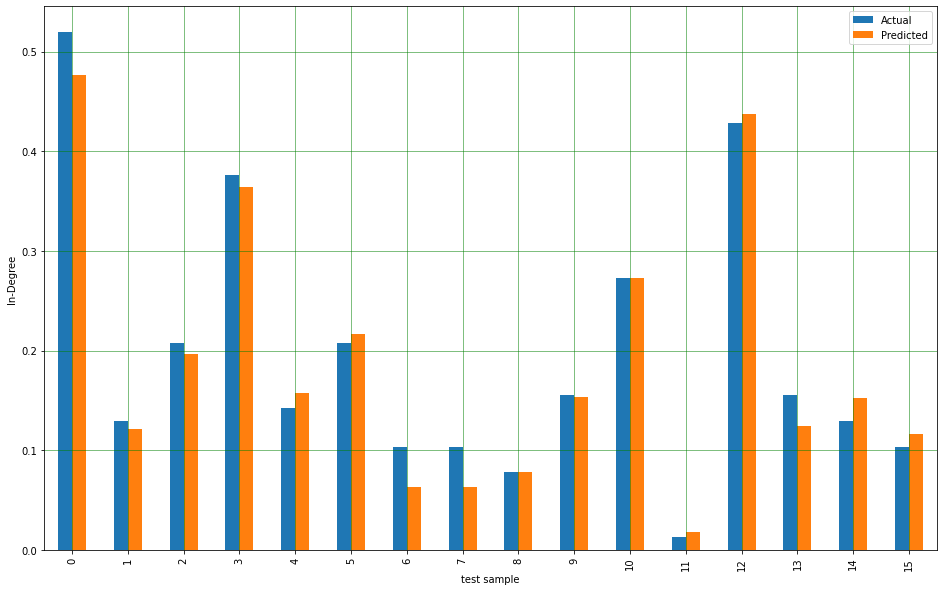

In [107]:
df1 = df
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel("test sample")
plt.ylabel("In-Degree")

plt.savefig('lr_indeg_pred.png', dpi=300, bbox_inches='tight')
plt.show()

In [108]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.01646261886294683
Mean Squared Error: 0.0004723392028565611
Root Mean Squared Error: 0.021733366118863433


The adjusted R-squared is a modified version of R-squared that adjusts for the number of predictors in a regression model. It is calculated as:

Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]

where:

    R2: The R2 of the model
    n: The number of observations
    k: The number of predictor variables


In [109]:
#calculate adj R^2 for TEST DATA
r2_score=metrics.r2_score(y_test, y_pred)
n = X_test.shape[0]
k = X_test.shape[1]
print("Adjusted R^2:", 1-(((1-r2_score)*(n-1))/(n-k-1)))

Adjusted R^2: 0.9638651344112218


In [110]:
#check adjusted R^2 params
print(n)
print(k)
print(r2_score)

16
4
0.9735010985682293


In [111]:
import statsmodels.formula.api as sm

#use OLS to get more stats about the regression 
#and to backward elimination based on P>|t|
result = sm.ols(formula="in_degree ~ pagerank + eigenvector + closeness + betweenness",
                  data=all_centralities_df).fit()


print(result.summary())


                            OLS Regression Results                            
Dep. Variable:              in_degree   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     1260.
Date:                Mon, 13 Sep 2021   Prob (F-statistic):           1.64e-66
Time:                        14:18:04   Log-Likelihood:                 204.41
No. Observations:                  78   AIC:                            -398.8
Df Residuals:                      73   BIC:                            -387.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.0392      0.012     -3.201      

In [126]:
result = sm.ols(formula="in_degree ~ pagerank + eigenvector",
                  data=all_centralities_df).fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              in_degree   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     1394.
Date:                Mon, 13 Sep 2021   Prob (F-statistic):           6.51e-44
Time:                        14:18:42   Log-Likelihood:                 132.43
No. Observations:                  52   AIC:                            -258.9
Df Residuals:                      49   BIC:                            -253.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.0140      0.006     -2.389      

## **Classification**


In [113]:
all_centralities_df["game"]=[d["game"] for n,d in G.nodes(data=True)]
all_centralities_df.describe()

,in_degree,betweenness,eigenvector,pagerank,closeness,game
count,78.000000,78.000000,7.800000e+01,78.000000,78.000000,77.000000
mean,0.203630,0.012367,9.039556e-02,0.012821,0.467334,8.636364
std,0.148289,0.017789,6.862605e-02,0.008004,0.115084,5.406889
min,0.000000,0.000000,4.573403e-22,0.002119,0.000000,4.000000
25%,0.081169,0.000445,2.926825e-02,0.005950,0.406185,4.000000
50%,0.175325,0.006069,8.033884e-02,0.012032,0.486105,6.000000
75%,0.298701,0.015088,1.450117e-01,0.017703,0.541855,12.000000
max,0.571429,0.098117,2.429430e-01,0.035526,0.660046,23.000000


In [114]:
all_centralities_df.dropna(inplace=True)

In [115]:
#select games with at least 4 streamers
all_centralities_df = all_centralities_df.loc[(all_centralities_df['game'] == 4.0) | 
                                              (all_centralities_df['game'] == 5.0) |
                                             (all_centralities_df['game'] == 6.0) | 
                                             (all_centralities_df['game'] == 8.0) |
                                             (all_centralities_df['game'] == 12.0)]

all_centralities_df["game"].replace({4.0: "Just Chatting", 5.0: "League of Legends", 6.0 : "Variety",
                   8.0 : "Fortnite" , 12.0 : "GTA 5"}, inplace=True)

/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:4515: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [116]:
all_centralities_df.game.unique()

array(['League of Legends', 'Variety', 'GTA 5', 'Just Chatting',
       'Fortnite'], dtype=object)

In [117]:
X=all_centralities_df.iloc[:,:-1]
#target value for classification: game category
y2 = all_centralities_df["game"]

In [118]:
X

,in_degree,betweenness,eigenvector,pagerank,closeness
0,0.220779,0.008887,0.096742,0.014448,0.495034
2,0.428571,0.055871,0.189312,0.026204,0.595794
3,0.064935,0.000742,0.036672,0.005746,0.440031
10,0.194805,0.004843,0.090145,0.011790,0.484350
13,0.051948,0.001340,0.011710,0.003912,0.365895
14,0.025974,0.000103,0.013238,0.003203,0.400742
17,0.194805,0.014686,0.096342,0.013002,0.487860
20,0.402597,0.020190,0.190078,0.022344,0.585432
21,0.012987,0.000120,0.001294,0.002854,0.284070
22,0.389610,0.029126,0.197038,0.022983,0.590567


In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.2, random_state=0)

In [120]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [121]:
model.score(X_train,y_train)

0.4146341463414634

In [122]:
cm = metrics.confusion_matrix(y_test, model.predict(X_test))
cm

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 6, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 2, 0, 0]])

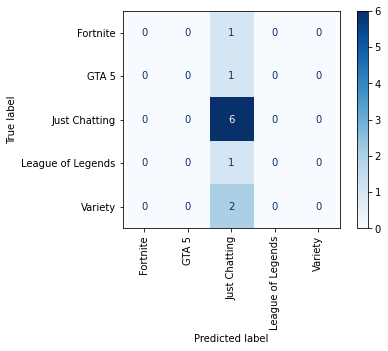

In [123]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test,
                                 #display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 xticks_rotation="vertical",
                                 normalize=None)

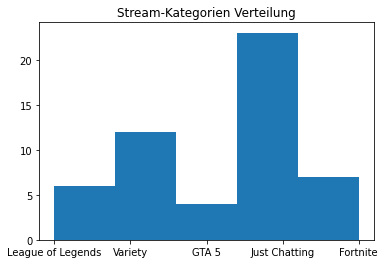

In [124]:
plt.hist(y2, 
         bins=5)
plt.title("Stream-Kategorien Verteilung")
plt.savefig('game_hist.png', dpi=300, bbox_inches='tight')